# Binary Classification Tutorial (CLF101) - Level Beginner

## 1.0 Tutorial Objective

本教程假设您是 PyCaret 的新手，并希望开始使用 `pycaret.classification` 模块进行二分类。

在本教程中，我们将学习：
- **Getting Data:** 如何从 PyCaret 库导入数据
- **Setting up Environment:** 如何在 PyCaret 中设置实验并开始构建分类模型
- **Create Model:** 如何创建模型、执行分层交叉验证和评估分类指标
- **Tune Model:** 如何自动调整分类模型的超参数
- **Plot Model:** 如何使用各种图表分析模型性能
- **Finalize Model:** 如何在实验结束时敲定最佳模型
- **Predict Model:** 如何对新的/看不见的数据进行预测
- **Save / Load Model:** 如何保存/加载模型以备将来使用

## 1.1 Installing PyCaret

开始使用 PyCaret 的第一步是安装 pycaret。安装很简单，只需几分钟。请按照以下说明操作：

In [ ]:
pip install pycaret

## 2.0 What is Binary Classification?

二分类是一种有监督的机器学习技术，其目标是预测离散且未排序的分类类标签，例如 Pass/Fail, Positive/Negative, Default/Not-Default 等。下面列出了一些真实世界的分类用例:
- 确定患者是否患有某种疾病的医学测试 - 分类属性是疾病的存在。
- 工厂中的“通过或失败”测试方法或质量控制，即确定是否满足规格——通过/不通过分类。
- 信息检索，即决定一个页面或一篇文章是否应该在搜索的结果集中——分类属性是文章的相关性，或者对用户的有用性。

## 3.0 Overview of the Classification Module in PyCaret

PyCaret 的分类模块 (`pycaret.classification`) 是一个 supervised 机器学习模块，用于根据各种技术和算法将元素分类为 binary group。分类问题的一些常见用例包括预测客户违约（Yes or No）、预测客户流失（客户将 leave or stay）、发现的疾病（positive or negative）。

PyCaret 分类模块可用于二分类或多类分类问题。它有超过 18 种算法和 14 个图表来分析模型的性能。无论是超参数调整、集成还是诸如堆叠之类的高级技术，PyCaret 的分类模块都应有尽有。

## 4.0 Dataset for the Tutorial

在本教程中，我们将使用来自 UCI 的数据集，称为信用卡客户违约数据集。此数据集包含 2005 年 4 月至 2005 年 9 月台湾信用卡客户的违约付款、人口因素、信用数据、付款历史和帐单的信息。有 24,000 个样本和 25 个特征。 各栏目简要说明如下：
- **ID:** 每个客户的ID
- **LIMIT_BAL:** 以新台币为单位的给定信用额度（包括个人和家庭/补充信用）
- **SEX:** 性别 (1=male, 2=female)
- **EDUCATION:** 教育 (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE:** 婚姻状况 (1=married, 2=single, 3=others)
- **AGE:** 年龄
- **PAY_1 to PAY_6:** n个月前的还款情况 (PAY_1 = last month ... PAY_6 = 6 months ago) (Labels: -1=按时付款, 1=付款延迟一个月, 2=付款延迟两个月, ... 8=付款延迟八个月, 9=付款延迟就个月及以上)
- **BILL_AMT1 to BILL_AMT6:** n个月前的帐单金额 ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)
- **PAY_AMT1 to PAY_AMT6:** n个月前的付款金额 ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)
- **default:** 违约付款 (1=yes, 0=no) Target Column

## 5.0 Getting the Data

您可以从此处找到的原始来源下载数据并使用 pandas 加载它（了解如何），或者您可以使用 PyCaret 的数据存储库使用 get_data() 函数加载数据（这将需要互联网连接）。

In [4]:
import pandas as pd
dataset = pd.read_csv('data/credit.csv')
dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000,1,2,2,34,2,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
23996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
23997,30000,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
23998,80000,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [5]:
#check the shape of data
dataset.shape

(24000, 24)

为了在 unseen data 上演示 `predict_model()` 函数，从原始数据集中保留了 1200 条记录的样本用于预测。这不应与 train/test 拆分混淆，因为执行此特定拆分是为了模拟现实生活场景。另一种思考方式是，在执行机器学习实验时，这 1200 条记录不可用。

In [6]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


## 6.0 Setting up Environment in PyCaret

`setup()` 函数初始化 pycaret 中的环境并创建 transformation pipeline，为建模和部署准备数据。`setup()` 必须在执行 pycaret 中的任何其他函数之前被调用。它需要两个强制参数：一个 pandas dataframe 和 target column 的名称。所有其他参数都是可选的，用于自定义 pre-processing pipeline（我们将在后面的教程中看到它们）。

执行 `setup()` 时，PyCaret 的推理算法会根据某些属性自动推断出所有特征的数据类型。应该正确推断数据类型，但情况并非总是如此。为了解决这个问题，PyCaret 在执行 `setup()` 后显示一个包含特征及其推断数据类型的表。如果正确识别了所有数据类型，则可以 enter 键继续，或者可以键入 quit 以结束实验。确保数据类型正确在 PyCaret 中至关重要，因为它会自动执行一些对任何机器学习实验都必不可少的预处理任务。这些任务针对每种数据类型执行不同，这意味着正确配置它们非常重要。

在后面的教程中，我们将学习如何使用 `setup()` 中的 `numeric_features`和 `categorical_features` 参数覆盖 PyCaret 推断的数据类型。

In [9]:
from pycaret.classification import *

In [10]:
exp_clf101 = setup(data = data, target = 'default', session_id=123) 

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


成功执行 `setup()` 后，它会打印包含几条重要信息的信息网格。大多数信息与执行 `setup()` 时构建的 pre-processing pipeline 有关。这些功能中的大多数都超出了本教程的范围，但在此阶段需要注意的一些重要事项包括：
- **session_id:** 一个伪随机数作为种子分布在所有函数中以供以后重现。如果没有传递 session_id，则会自动生成一个随机数，分发给所有函数。在这个实验中，session_id 被设置为 123 以用于以后的重现性。
- **Target Type:** Binary or Multiclass。目标类型会自动检测并显示。对于二分类或多分类问题的实验执行方式没有区别。所有功能都相同。
- **Label Encoded:** 当 Target 变量是字符串类型（即 'Yes' 或 'No'）而不是 1 或 0 时，它会自动将标签编码为 1 和 0 并显示映射（0：否，1：是）以供参考。在这个实验中不需要标签编码，因为目标变量是数字类型。
- **Original Data:** 显示数据集的原始形状。在本实验中，(22800, 24) 表示 22,800 个样本和 24 个特征，包括 target column。
- **Missing Values:** 当原始数据中存在缺失值时，这将显示为 True。对于这个实验，数据集中没有缺失值。
- **Numeric Features:** 推断为数字的特征数。在此数据集中，24 个特征中有 14 个被推断为数字。
- **Categorical Features:** 推断为分类的特征数量。在此数据集中，24 个特征中有 9 个被推断为分类特征。
- **Transformed Train Set:** 显示转换后的训练集的形状。请注意，对于转换后的训练集，(22800, 24) 的原始形状被转换为 (15959, 91)，并且由于分类编码，特征数量从 24 增加到 91。
- **Transformed Test Set:** 显示转换后的测试/保留集的形状。测试/保留集中有 6841 个样本。此拆分基于默认值 70/30，可以使用设置中的 train_size 参数更改该默认值。

请注意如何自动处理执行建模所必需的一些任务，例如缺失值 imputation（在这种情况下，训练数据中没有缺失值，但我们仍然需要对 unseen data 进行imputation）、分类编码等。大部分 `setup()` 中的参数是可选的，用于自定义 pre-processing pipeline。这些参数超出了本教程的范围，但随着您进入中级和专家级别，我们将更详细地介绍它们。

## 7.0 Comparing All Models

一旦设置完成，比较所有模型以评估性能是建议的建模起点（除非您确切知道您需要哪种模型，但通常情况并非如此）。该函数训练模型库中的所有模型，并使用分层交叉验证对它们进行评分以进行指标评估。输出打印一个分数网格，显示平均准确度、AUC、召回率、精度、F1、Kappa 和 MCC（默认为 10）以及训练时间。

In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.0170
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.1030
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.3551,0.6806,0.4664,0.3725,0.4010,0.6070
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,0.1430
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.3609,0.6679,0.4683,0.3721,0.3977,0.0480
rf,Random Forest Classifier,0.8199,0.7598,0.3663,0.6601,0.4707,0.3727,0.3965,0.2760
et,Extra Trees Classifier,0.8092,0.7377,0.3677,0.6047,0.4571,0.3497,0.3657,0.2650
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,0.3550
dummy,Dummy Classifier,0.7814,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0130
knn,K Neighbors Classifier,0.7547,0.5939,0.1763,0.3719,0.2388,0.1145,0.1259,0.2020


/home/zhenghu/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23159e-15): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/zhenghu/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/zhenghu/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/zhenghu/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/zhenghu/anaconda3/envs/pyca

/home/zhenghu/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24649e-15): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/zhenghu/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/zhenghu/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/home/zhenghu/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

/home/zhenghu/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/zhenghu/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/zhenghu/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/zhenghu/anaconda3/envs/pycaret/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/zhenghu/an

两个简单的代码词（甚至不是一行）已经使用交叉验证训练和评估了超过 15 个模型。上面打印的分数网格突出显示了性能最高的指标，仅供比较之用。默认情况下，网格使用'Accuracy'（从最高到最低）排序，可以通过传递 `sort` 参数来更改。例如 `compare_models(sort = 'Recall')` 将按 'Recall' 而不是 'Accuracy' 对网格进行排序。如果要将 `fold` 参数从默认值 10 更改为其他值，则可以使用 `fold` 参数。 例如 `compare_models(fold = 5)` 将在 5 fold 交叉验证上比较所有模型。减少folds次数将缩短训练时间。默认情况下，`compare_models` 根据默认排序顺序返回性能最佳的模型，但可用于通过使用 `n_select` 参数返回前 N 个模型的列表。

In [12]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


## 8.0 Create a Model

`create_model` 是 PyCaret 中最细粒度的函数，通常是大多数 PyCaret 功能背后的基础。顾名思义，此函数使用可使用`fold`参数设置的交叉验证来训练和评估模型。输出打印一个分数网格，按 fold 显示 Accuracy、AUC、Recall、Precision、F1、Kappa 和 MCC。

对于本教程的其余部分，我们将使用以下模型作为我们的候选模型。这些选择仅用于说明目的，并不一定意味着它们是此类数据的最佳表现或理想选择。
- Decision Tree Classifier ('dt')
- K Neighbors Classifier ('knn')
- Random Forest Classifier ('rf')

PyCaret 的模型库中有 18 个分类器可用。要查看所有分类器的列表，请检查文档字符串或使用模型函数来查看库。

In [13]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## 8.1 Decision Tree Classifier

In [14]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7343,0.6257,0.4327,0.4005,0.4160,0.2444,0.2447
1,0.7325,0.6277,0.4384,0.3984,0.4175,0.2443,0.2448
2,0.7431,0.6282,0.4241,0.4146,0.4193,0.2544,0.2544
3,0.7274,0.6151,0.4155,0.3856,0.4000,0.2240,0.2242
4,0.7187,0.6054,0.4040,0.3691,0.3858,0.2038,0.2042
5,0.7187,0.6014,0.3897,0.3656,0.3773,0.1958,0.1960
6,0.7206,0.6128,0.4212,0.3760,0.3973,0.2162,0.2168
7,0.7331,0.5986,0.3610,0.3830,0.3717,0.2024,0.2026
8,0.7206,0.6045,0.3983,0.3707,0.3840,0.2036,0.2038


In [15]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


## 8.2 K Neighbors Classifier

In [16]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7469,0.6020,0.1920,0.3545,0.2491,0.1128,0.1204
1,0.7550,0.5894,0.2092,0.3883,0.2719,0.1402,0.1500
2,0.7506,0.5883,0.1576,0.3459,0.2165,0.0923,0.1024
3,0.7419,0.5818,0.1519,0.3136,0.2046,0.0723,0.0790
4,0.7563,0.5908,0.1490,0.3611,0.2110,0.0954,0.1085
5,0.7550,0.5997,0.1748,0.3720,0.2378,0.1139,0.1255
6,0.7638,0.5890,0.1891,0.4125,0.2593,0.1413,0.1565
7,0.7613,0.6240,0.1633,0.3904,0.2303,0.1163,0.1318
8,0.7619,0.5988,0.1862,0.4037,0.2549,0.1356,0.1500


## 8.3 Random Forest Classifier

In [17]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.7673,0.3610,0.6269,0.4582,0.3551,0.3749
1,0.8239,0.7615,0.3782,0.6735,0.4844,0.3882,0.4117
2,0.8258,0.7708,0.3467,0.7076,0.4654,0.3756,0.4098
3,0.8177,0.7605,0.3725,0.6436,0.4719,0.3710,0.3913
4,0.8208,0.7642,0.3725,0.6599,0.4762,0.3780,0.4006
5,0.8283,0.7638,0.3954,0.6866,0.5018,0.4070,0.4297
6,0.8127,0.7647,0.3582,0.6250,0.4554,0.3522,0.3721
7,0.8283,0.7390,0.3553,0.7168,0.4751,0.3861,0.4202
8,0.8108,0.7496,0.3610,0.6146,0.4549,0.3496,0.3678


请注意，所有模型的平均分数与 `compare_models()` 中打印的分数相匹配。这是因为 `compare_models()` 分数网格中打印的指标是所有交叉验证 folds 的平均分数。与 `compare_models()` 类似，如果您想将 fold 参数从默认值 10 更改为其他值，则可以使用 `fold` 参数。 例如：`create_model('dt', fold = 5)` 将使用 5 fold 分层交叉验证创建决策树分类器。

## 9.0 Tune a Model

当使用 `create_model()` 函数创建模型时，它使用默认的超参数来训练模型。为了调整超参数，使用了 `tune_model()` 函数。此函数使用预定义搜索空间上的随机网格搜索自动调整模型的超参数。输出打印一个分数网格，显示最佳模型的 Accuracy、AUC、Recall、Precision、F1、Kappa 和 MCC。要使用自定义搜索网格，您可以在 `tune_model` 函数中传递 `custom_grid` 参数（参见下面的 9.2 KNN tuning）。

## 9.1 Decision Tree Classifier

In [18]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8177,0.7475,0.3095,0.6835,0.4260,0.3355,0.3728
1,0.8289,0.7711,0.3381,0.7375,0.4637,0.3782,0.4190
2,0.8208,0.7377,0.2894,0.7266,0.4139,0.3305,0.3796
3,0.8252,0.7580,0.3152,0.7333,0.4409,0.3563,0.4010
4,0.8195,0.7545,0.3095,0.6968,0.4286,0.3398,0.3794
5,0.8271,0.7509,0.3438,0.7186,0.4651,0.3769,0.4134
6,0.8195,0.7488,0.3123,0.6943,0.4308,0.3415,0.3801
7,0.8246,0.7529,0.2980,0.7482,0.4262,0.3446,0.3957
8,0.8195,0.7241,0.3123,0.6943,0.4308,0.3415,0.3801


In [19]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


## 9.2 K Neighbors Classifier

In [20]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7813,0.6482,0.0372,0.5000,0.0693,0.0402,0.0876
1,0.7807,0.6436,0.0315,0.4783,0.0591,0.0330,0.0759
2,0.7744,0.6563,0.0315,0.3333,0.0576,0.0206,0.0403
3,0.7845,0.6589,0.0659,0.5610,0.1179,0.0754,0.1345
4,0.7826,0.6645,0.0315,0.5500,0.0596,0.0368,0.0903
5,0.7794,0.6477,0.0544,0.4634,0.0974,0.0539,0.0961
6,0.7826,0.6278,0.0630,0.5238,0.1125,0.0688,0.1214
7,0.7751,0.6702,0.0372,0.3611,0.0675,0.0278,0.0523
8,0.7813,0.6409,0.0630,0.5000,0.1120,0.0662,0.1146


In [21]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='uniform')


## 9.3 Random Forest Classifier

In [22]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8158,0.7508,0.3181,0.6647,0.4302,0.3363,0.3689
1,0.8283,0.7675,0.3295,0.7419,0.4563,0.3719,0.4152
2,0.8139,0.7337,0.3181,0.6529,0.4277,0.3321,0.3628
3,0.8246,0.7588,0.3095,0.7347,0.4355,0.3514,0.3976
4,0.8170,0.7567,0.3438,0.6557,0.4511,0.3539,0.3805
5,0.8258,0.7506,0.3324,0.7205,0.4549,0.3676,0.4067
6,0.8170,0.7530,0.3324,0.6629,0.4427,0.3474,0.3771
7,0.8221,0.7507,0.3381,0.6901,0.4538,0.3621,0.3951
8,0.8177,0.7201,0.2980,0.6933,0.4168,0.3286,0.3699


默认情况下，`tune_model` 优化 `Accuracy`，但这可以使用 `optimize` 参数进行更改。例如：`tune_model(dt, optimize = 'AUC')` 将搜索导致最高 `AUC` 而不是 `Accuracy` 的决策树分类器的超参数。出于本示例的目的，我们使用默认指标 `Accuracy` 只是为了简单起见。通常，当数据集不平衡时（例如我们正在使用的信用数据集），`Accuracy`不是一个值得考虑的好指标。选择正确的指标来评估分类器的方法超出了本教程的范围，但如果您想了解更多信息，可以单击此处阅读有关如何选择正确的评估指标的文章。

在最终确定最佳生产模型时，指标本身并不是您应该考虑的唯一标准。其他需要考虑的因素包括训练时间、kfolds 的标准偏差等。随着教程系列的进展，我们将在中级和专家级别详细讨论这些因素。现在，让我们继续考虑 Tuned Random Forest Classifier tuned_rf，作为本教程剩余部分的最佳模型。

## 10.0 Plot a Model

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

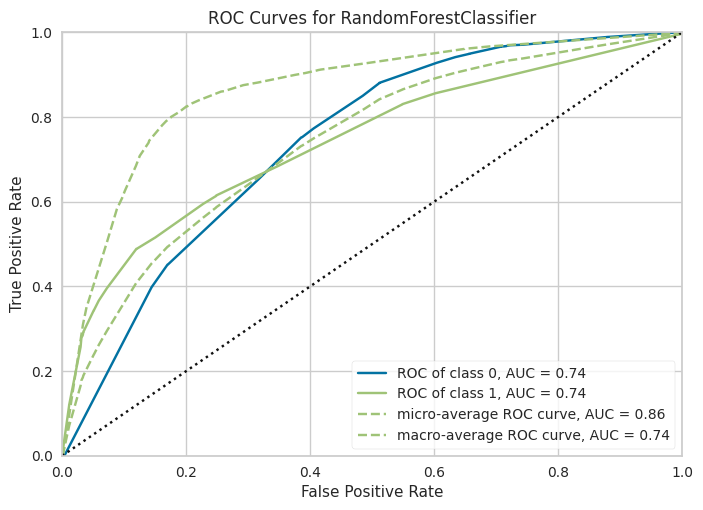

In [23]:
plot_model(tuned_rf, plot = 'auc')

## 10.2 Precision-Recall Curve

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

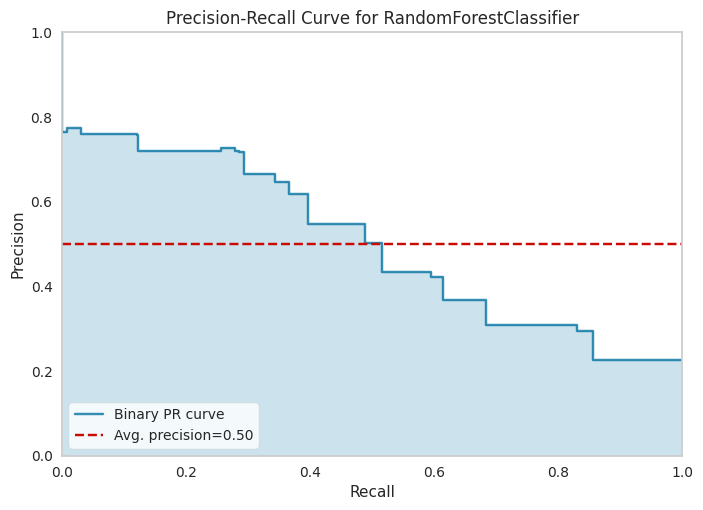

In [24]:
plot_model(tuned_rf, plot = 'pr')

## 10.3 Feature Importance Plot

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

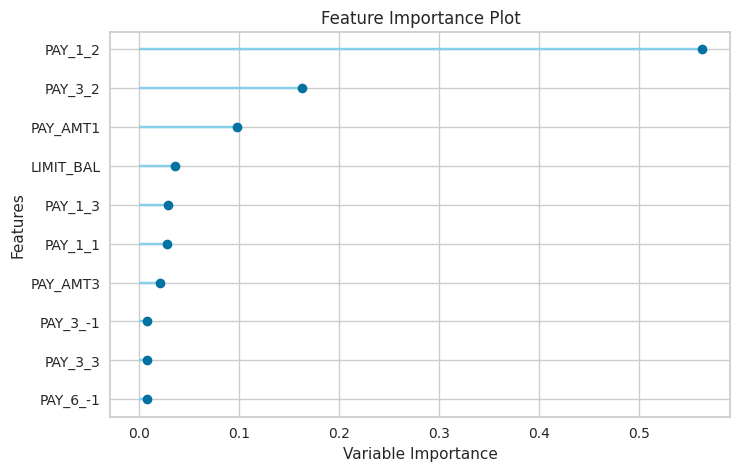

In [25]:
plot_model(tuned_rf, plot='feature')

## 10.4 Confusion Matrix

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

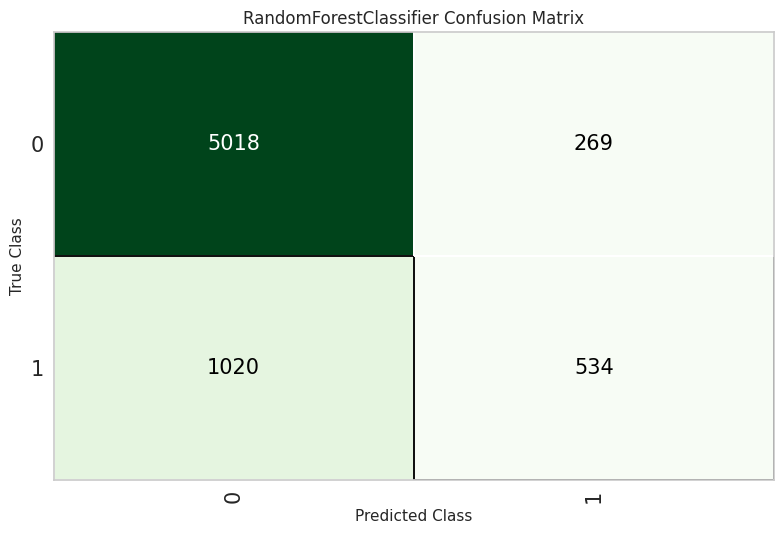

In [26]:
plot_model(tuned_rf, plot = 'confusion_matrix')

另一种分析模型性能的方法是使用 `evaluate_model()` 函数，该函数为给定模型的所有可用图显示用户界面。 它在内部使用 `plot_model()` 函数。

In [27]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 11.0 Predict on test / hold-out Sample

在最终确定模型之前，建议通过预测测试/保留集和审查评估指标来执行最终检查。如果您查看上面第 6 节中的信息网格，您会看到 30%（6,841 个样本）的数据已作为测试/保留样本分离出来。我们上面看到的所有评估指标都是仅基于训练集（70%）的交叉验证结果。现在，使用存储在 tuned_rf 变量中的最终训练模型，我们将针对保留样本进行预测并评估指标，以查看它们是否与 CV 结果有实质性不同。

In [28]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8116,0.7407,0.3436,0.6650,0.4531,0.3530,0.3811


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,80000.0,29.0,6228.0,589.0,390.0,390.0,390.0,383.0,589.0,390.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8452
1,180000.0,30.0,149069.0,152317.0,156282.0,161163.0,172190.0,148963.0,7500.0,8000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.9201
2,100000.0,26.0,18999.0,23699.0,9390.0,5781.0,8065.0,17277.0,5129.0,1227.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9201
3,500000.0,36.0,396.0,1043.0,19230.0,116696.0,194483.0,195454.0,1043.0,19230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8452
4,190000.0,47.0,192493.0,193297.0,193400.0,193278.0,192956.0,193039.0,7200.0,7222.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,120000.0,44.0,75294.0,76465.0,74675.0,79629.0,77748.0,82497.0,3000.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5649
6837,50000.0,26.0,47095.0,48085.0,49039.0,49662.0,0.0,0.0,2073.0,2027.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8394
6838,80000.0,39.0,46401.0,39456.0,30712.0,29629.0,28241.0,28030.0,1560.0,1421.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8452
6839,200000.0,33.0,50612.0,10537.0,5552.0,2506.0,9443.0,11818.0,10023.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7548


测试/保留集的准确度为 0.8116，而 tuned_rf CV 结果的准确度为 0.8203（在上面的第 9.3 节中）。 这不是显着差异。如果测试/保持和 CV 结果之间存在较大差异，那么这通常表明过度拟合，但也可能是由于其他几个因素造成的，需要进一步调查。在这种情况下，我们将继续完成模型并预测 unseen 的数据（我们在开始时分离并且从未暴露给 PyCaret 的 5%）。

## 12.0 Finalize Model for Deployment

模型定型是实验的最后一步。PyCaret 中的正常机器学习工作流程从 `setup()` 开始，然后使用 `compare_models()` 比较所有模型并筛选出一些候选模型（基于感兴趣的指标）以执行多种建模技术，例如超参数调整、集成、堆叠等。此工作流最终将引导您找到用于对新数据和未见数据进行预测的最佳模型。 `finalize_model()` 函数将模型拟合到包括测试/保留样本（在本例中为 30%）在内的完整数据集。此功能的目的是在将模型部署到生产环境之前在完整数据集上训练模型。

In [29]:
final_rf = finalize_model(tuned_rf)

In [30]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


警告：最后一句警告。使用 `finalize_model()` 完成模型后，包括测试/保留集在内的整个数据集将用于训练。因此，如果在使用 `finalize_model()` 之后将模型用于对保留集的预测，则打印的信息网格会产生误导，因为您正试图对用于建模的相同数据进行预测。为了仅演示这一点，我们将使用 `predict_model()` 下的 `final_rf` 将信息网格与上面第 11 节中的信息网格进行比较。

In [31]:
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8184,0.7526,0.3533,0.6985,0.4692,0.3736,0.4053


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,80000.0,29.0,6228.0,589.0,390.0,390.0,390.0,383.0,589.0,390.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8051
1,180000.0,30.0,149069.0,152317.0,156282.0,161163.0,172190.0,148963.0,7500.0,8000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.9121
2,100000.0,26.0,18999.0,23699.0,9390.0,5781.0,8065.0,17277.0,5129.0,1227.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8051
3,500000.0,36.0,396.0,1043.0,19230.0,116696.0,194483.0,195454.0,1043.0,19230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9121
4,190000.0,47.0,192493.0,193297.0,193400.0,193278.0,192956.0,193039.0,7200.0,7222.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,120000.0,44.0,75294.0,76465.0,74675.0,79629.0,77748.0,82497.0,3000.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5013
6837,50000.0,26.0,47095.0,48085.0,49039.0,49662.0,0.0,0.0,2073.0,2027.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8603
6838,80000.0,39.0,46401.0,39456.0,30712.0,29629.0,28241.0,28030.0,1560.0,1421.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8051
6839,200000.0,33.0,50612.0,10537.0,5552.0,2506.0,9443.0,11818.0,10023.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8051


请注意 `final_rf` 中的 AUC 如何从 0.7407 增加到 0.7526，即使模型相同。这是因为 `final_rf` 变量已经在包括测试/保留集在内的完整数据集上进行了训练。

## 13.0 Predict on unseen data

`predict_model()` 函数也用于对 unseen dataset 进行预测。与上面第 11 节的唯一区别是这次我们将传递 `data_unseen` 参数。`data_unseen` 是在教程开始时创建的变量，包含从未暴露给 PyCaret 的原始数据集的 5%（1200 个样本）。（解释见第 5 节）

In [32]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8167,0.7768,0.3612,0.6463,0.4634,0.3634,0.3857


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121


`Label` 和 `Score` 列被添加到 `data_unseen` 集。 Label 是预测，score 是预测的概率。请注意，预测结果连接到原始数据集，而所有转换都在后台自动执行。您还可以检查这方面的指标，因为您有可用的实际目标列默认值。为此，我们将使用 `pycaret.utils` 模块。请参见下面的示例：

In [33]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'Accuracy')

0.8167

## 14.0 Saving the model

我们现在已经通过最终确定现在存储在 `final_rf` 变量中的 `tuned_rf` 模型完成了实验。我们还使用存储在 `final_rf` 中的模型来预测 `data_unseen`。 实验到此结束，但仍有一个问题有待解决：当您有更多新数据要预测时会发生什么？是否必须重新进行整个实验？答案是否定的，PyCaret 的内置函数 `save_model()` 允许您将模型连同整个转换管道一起保存以备后用。

In [34]:
save_model(final_rf,'Final RF Model 11Nov2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

## 15.0 Loading the saved model

要在未来某个日期在相同或替代环境中加载保存的模型，我们将使用 PyCaret 的 `load_model()` 函数，然后轻松地将保存的模型应用于新的未见数据以进行预测。

In [35]:
saved_final_rf = load_model('Final RF Model 11Nov2020')

Transformation Pipeline and Model Successfully Loaded


将模型加载到环境中后，您可以使用相同的 `predict_model()` 函数简单地使用它来预测任何新数据。下面我们应用加载的模型来预测我们在上面第 13 节中使用的相同 `data_unseen`。

In [36]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8167,0.7768,0.3612,0.6463,0.4634,0.3634,0.3857


In [37]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121


请注意，`unseen_predictions` 和 `new_prediction` 的结果是相同的。

In [38]:
from pycaret.utils import check_metric
check_metric(new_prediction['default'], new_prediction['Label'], metric = 'Accuracy')

0.8167

## 16.0 Wrap-up / Next Steps?

本教程涵盖了整个机器学习管道，从数据摄取、预处理、模型训练、超参数调整、预测和保存模型以备后用。我们在不到 10 个命令中完成了所有这些步骤，这些命令是自然构造的并且非常容易记住，例如 `create_model()`、`tune_model()`、`compare_models()`。在大多数库中，如果不使用 PyCaret 重新创建整个实验，将需要 100 多行代码。

我们只介绍了 `pycaret.classification` 的基础知识。在接下来的教程中，我们将更深入地介绍高级预处理、集成、广义堆叠和其他技术，这些技术可让您完全自定义机器学习管道，并且是任何数据科学家都必须知道的。

See you at the next tutorial. Follow the link to [Binary Classification Tutorial (CLF102) - Intermediate Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

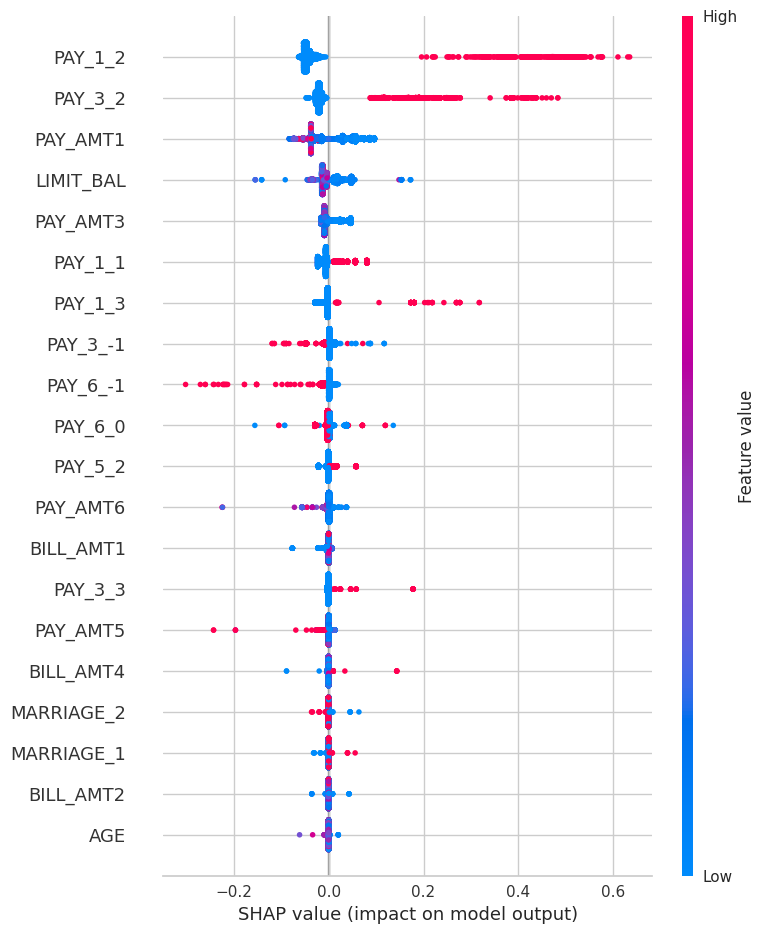

In [40]:
interpret_model(tuned_rf)